# Building an Image Classifier using Keras and TensorFlow
### Don't forget to run the following commands in order to import the proper libraries
### You may also need to be in a separate environment in order to run TensorFlow

In [11]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Conda commands for installing tensorflow, pip, and keras if you don't already have them
#conda install tensorflow
#conda install pip
#pip install --upgrade tensorflow==2.0.0-rc1

import tensorflow as tf
from tensorflow import keras

## Here are some examples of what the data looks like and how the Kaggle dataset is structured
### Link for the dataset download: https://drive.google.com/file/d/16AlwTDOeyFaiP3RPxKOk5s80IycK80X4/view
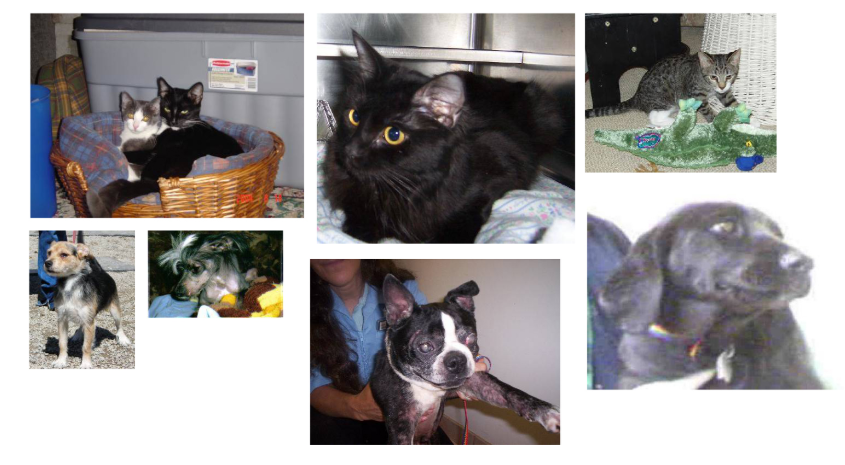


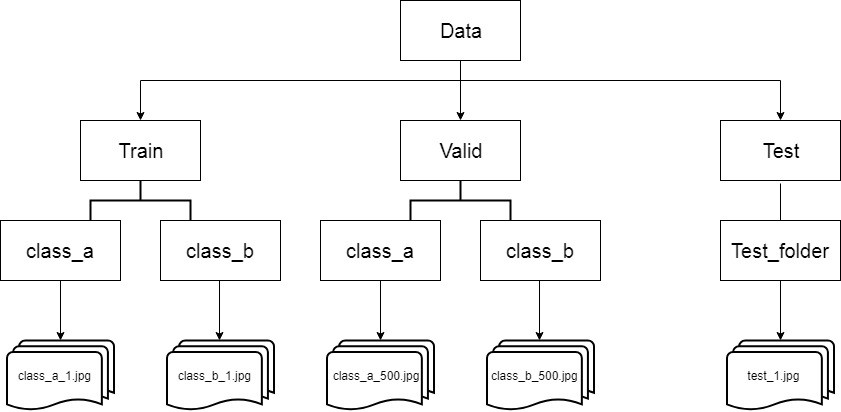

In [5]:
#The first step is retrieving the data and doing some preprocessing in order to feed it into the CNN

#Change these directories to your specifications
trainDir = r'C:\Users\noahe\Documents\UdemyCourses\train'
validDir = r'C:\Users\noahe\Documents\UdemyCourses\validation'
testDir = r'C:\Users\noahe\Documents\UdemyCourses\test'

#Using Keras's ImageDataGenerator function to convert the images to RGB pixel grids, convert those grids into tensors,
#and then normalize the pixel values to be between 0 and 1 by dividing them by 255.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainingData = ImageDataGenerator(rescale=1./255)
testingData = ImageDataGenerator(rescale=1./255)

trainingGenerator = trainingData.flow_from_directory(
        trainDir,
        target_size=(150, 150), #Since the images aren't standarized, we choose a size we want them to be
        batch_size=20, #Feeding 20 images into the model at a time
        class_mode='binary'
) #Binary since there are only two outcomes: cats or dogs

validationGenerator = testingData.flow_from_directory(
        validDir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Now that the data is in proper format, we can now create the neural network using Keras

In [6]:
#Our model is going to have 4 convolutional layers (with their own pooling layer), a flattened input layer, one dense
#layer, and then the output layer
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) #3 channels for RGB
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) #Relu is the best activation method for classification
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu')) #128 neurons with 3x3 kernel iterating over the image
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#It's a general best practice to double the amount of neurons/filters on each conv layer up to 128
#Each conv layer extracts more features but the pooling layer makes the image smaller and smaller
#150 -> 75 -> 37.5 ......

#Printing out the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
#We'll now compile our model to specify our loss function, the optimizer, and what metrics to use
model.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

#We use binary_crossentropy since our outcomes are binary (cats or dogs)

#Next, we fit our data using fit_generator. It could take a while.
modelHistory = model.fit_generator(
      trainingGenerator,
      steps_per_epoch = 100, #We choose 100 since there are 2000 images in the training directory and the batches are 20
      epochs = 20,
      validation_data=validationGenerator,
      validation_steps = 50
) #Likewise, we choose 50 here since there are only 1000 images in the validation directory

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 62s 618ms/step - loss: 0.6881 - accuracy: 0.5455 - val_loss: 0.6737 - val_accuracy: 0.5500
Epoch 2/20
100/100 [==============================] - 55s 549ms/step - loss: 0.6592 - accuracy: 0.6165 - val_loss: 0.6625 - val_accuracy: 0.5670
Epoch 3/20
100/100 [==============================] - 59s 588ms/step - loss: 0.6088 - accuracy: 0.6705 - val_loss: 0.6130 - val_accuracy: 0.6540
Epoch 4/20
100/100 [==============================] - 55s 554ms/step - loss: 0.5656 - accuracy: 0.7140 - val_loss: 0.6200 - val_accuracy: 0.6470
Epoch 5/20
100/100 [==============================] - 58s 580ms/step - loss: 0.5400 - accuracy: 0.7330 - val_loss: 0.5828 - val_accuracy: 0.7080
Epoch 6/20
100/100 [==============================] - 58s 583ms/step - loss: 0.5099 - accuracy: 0.7570 - val_loss: 0.6225 - val_accuracy: 0.6620
Epoch 7/20
100/100 [==============================] - 

## Once the model has been compiled and ran, it's now time to evaluate how it performed.
### We will also show how to make predictions using our model

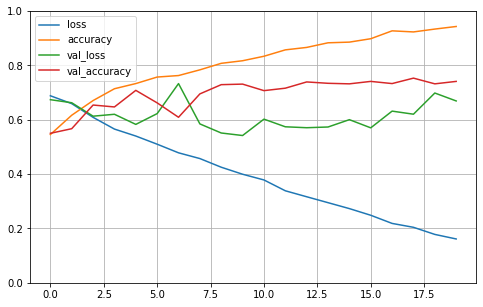

In [12]:
#A graph showing how the training loss/accuracy and the validation loss/accuracy changed over each epoch
pd.DataFrame(modelHistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#While the training loss and accuracy continued to improve, the validation loss and accuracy stagnated or fluctuated
#This is a common sign of overfitting.

### To improve the overfitting problem, we'll generate new data by rotating, zooming, scaling, and further modifying our existing image set to make our model more adaptable.

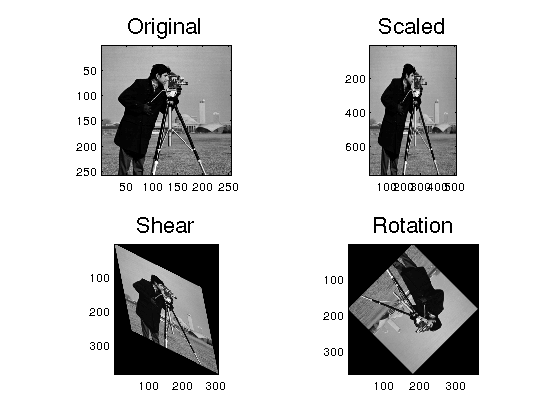

In [35]:
#We'll run very similar code to what we did before but now we'll add some modifications to the training data
trainingData = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

testingData = ImageDataGenerator(rescale=1./255)

trainingGenerator = trainingData.flow_from_directory(
        trainDir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary'
)

validationGenerator = testingData.flow_from_directory(
        validDir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
#Now, we'll just copy and paste our model from above since it's almost the same
#Our model is going to have 4 convolutional layers (with their own pooling layer), a flattened input layer, one dense
#layer, and then the output layer
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) #3 channels for RGB
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) #Relu is the best activation method for classification
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu')) #128 neurons with 3x3 kernel iterating over the image
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) #This is the one new layer. It deactivates 50% of the neurons each epoch to avoid
                                     #overfitting.
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#It's a general best practice to double the amount of neurons/filters on each conv layer up to 128
#Each conv layer extracts more features but the pooling layer makes the image smaller and smaller
#150 -> 75 -> 37.5 ......

#Printing out the summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [37]:
#We'll also just copy and paste our compiling and fitting steps

#We'll now compile our model to specify our loss function, the optimizer, and what metrics to use
model.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

#We use binary_crossentropy since our outcomes are binary (cats or dogs)

#Next, we fit our data using fit_generator. It could take a while depending on your epoch value.
modelHistory = model.fit_generator(
      trainingGenerator,
      steps_per_epoch = 100,
      epochs = 20,
      validation_data = validationGenerator,
      validation_steps = 50
)

Epoch 1/20
100/100 [==============================] - 73s 728ms/step - loss: 0.6962 - accuracy: 0.5095 - val_loss: 0.6846 - val_accuracy: 0.6060
Epoch 2/20
100/100 [==============================] - 61s 614ms/step - loss: 0.6888 - accuracy: 0.5485 - val_loss: 0.6700 - val_accuracy: 0.5830
Epoch 3/20
100/100 [==============================] - 62s 616ms/step - loss: 0.6787 - accuracy: 0.5590 - val_loss: 0.6653 - val_accuracy: 0.5670
Epoch 4/20
100/100 [==============================] - 78s 784ms/step - loss: 0.6666 - accuracy: 0.5975 - val_loss: 0.6646 - val_accuracy: 0.5640
Epoch 5/20
100/100 [==============================] - 1831s 18s/step - loss: 0.6587 - accuracy: 0.6060 - val_loss: 0.6291 - val_accuracy: 0.6180
Epoch 6/20
100/100 [==============================] - 59s 586ms/step - loss: 0.6394 - accuracy: 0.6230 - val_loss: 0.6150 - val_accuracy: 0.6610
Epoch 7/20
100/100 [==============================] - 65s 655ms/step - loss: 0.6272 - accuracy: 0.6435 - val_loss: 0.6018 - val_ac

In [23]:
#You can now see the accuracy and validation accuracy are more in line with eachother showing that it's no longer 
#overfitted. We do give up some accuracy though.

### There are also many pre-built CNN's such as VGGNet, GoogLeNet, LeNet, ResNet, etc.
### We will show how to use VGGNet and see how it performs compared to model we built earlier

In [39]:
#We will just copy and paste the pre-processing we did earlier

trainingData = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

testingData = ImageDataGenerator(rescale=1./255)

trainingGenerator = trainingData.flow_from_directory(
        trainDir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary'
)

validationGenerator = testingData.flow_from_directory(
        validDir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
#Instead of adding 4 convolutional layers as our base, we'll just use the pre-built VGGNet conv base.
from tensorflow.keras.applications import VGG16

convBase = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

#We'll print the summary to show what VGGNet's structure is
convBase.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [41]:
#We'll then add the last layers to the base that just flattens the data, has a single dense layer, and then an output.
model = keras.models.Sequential()
model.add(convBase)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#We'll now compile our model to specify our loss function, the optimizer, and what metrics to use
model.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

#We use binary_crossentropy since our outcomes are binary (cats or dogs)

#Next, we fit our data using fit_generator. It could take a while depending on your epoch value.
modelHistory = model.fit_generator(
      trainingGenerator,
      steps_per_epoch = 100,
      epochs = 20,
      validation_data = validationGenerator,
      validation_steps = 50
)

Epoch 1/20
100/100 [==============================] - 60384s 604s/step - loss: 0.7903 - accuracy: 0.5015 - val_loss: 0.6747 - val_accuracy: 0.5140
Epoch 2/20
100/100 [==============================] - 828s 8s/step - loss: 0.6654 - accuracy: 0.6065 - val_loss: 0.5374 - val_accuracy: 0.7090
Epoch 3/20
100/100 [==============================] - 768s 8s/step - loss: 0.5459 - accuracy: 0.7215 - val_loss: 0.3726 - val_accuracy: 0.8270
Epoch 4/20
100/100 [==============================] - 2408s 24s/step - loss: 0.4862 - accuracy: 0.7765 - val_loss: 0.3510 - val_accuracy: 0.8370
Epoch 5/20
100/100 [==============================] - 793s 8s/step - loss: 0.4156 - accuracy: 0.8075 - val_loss: 0.2889 - val_accuracy: 0.8740
Epoch 6/20
100/100 [==============================] - 640s 6s/step - loss: 0.3706 - accuracy: 0.8440 - val_loss: 0.3177 - val_accuracy: 0.8700
Epoch 7/20
100/100 [==============================] - 429s 4s/step - loss: 0.3613 - accuracy: 0.8605 - val_loss: 0.3282 - val_accuracy: 

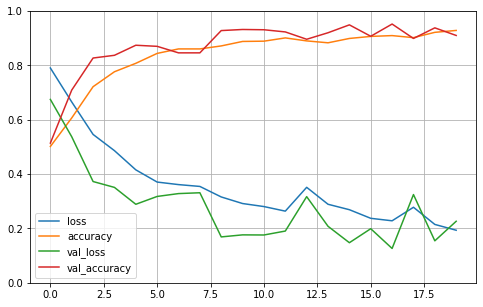

In [42]:
#Graph showing the accuracy and loss as each epoch comes
pd.DataFrame(modelHistory.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#We achieve well over 90% accuracy without overfitting

In [45]:
#Loading the testing data in order to evaluate our model
testingGenerator = testingData.flow_from_directory(
        testDir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

#Evaluating our VGG model
model.evaluate(testingGenerator, steps=50)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 37s 734ms/step - loss: 0.2770 - accuracy: 0.8840


[0.277038037776947, 0.8840000033378601]